In [78]:
import pandas as pd

from pandas import DataFrame

from scipy import stats

import numpy as np

import math

from matplotlib import pyplot as plt

import seaborn as sns

In [79]:
trips_month = pd.read_csv('C:/Users/ZachF/Documents/PDX-Data-Science/TriMet_Data/Week2-clean/trips_month.csv')
df_monthTrips = pd.DataFrame(trips_month)
df_monthTrips

,tripID,vehicle_id,blockID,direction,garage,routeNumber
0,6997146,416,9043,0,ELMO,90
1,6997146,417,9043,0,ELMO,90
2,6997147,303,9047,0,ELMO,90
3,6997147,313,9047,0,ELMO,90
4,6997148,221,9044,0,ELMO,90
5,6997148,242,9044,0,ELMO,90
6,6997149,251,9048,0,ELMO,90
7,6997149,326,9048,0,ELMO,90
8,6997150,233,9040,0,ELMO,90
9,6997150,238,9040,0,ELMO,90


In [80]:
events_month = pd.read_csv('C:/Users/ZachF/Documents/PDX-Data-Science/TriMet_Data/Week2-clean/events_month.csv')
df_monthEvents = pd.DataFrame(events_month)
df_monthEvents

,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,signMessageLong,tripID,vehicle_id,vehicle_location_longitude,vehicle_location_latitude
0,42,-138,2017-01-01 00:05:35,10572,23,10574,24,MAX Red Line to Airport,6997146,416,-122.563200,45.560901
1,270,-107,2017-01-01 00:07:26,10574,24,10576,25,MAX Red Line to Airport,6997146,416,-122.561480,45.572588
2,299,-138,2017-01-01 00:10:39,10576,25,10579,26,MAX Red Line to Airport,6997146,416,-122.571721,45.580453
3,1,-136,2017-01-01 00:04:51,11616,22,10572,23,MAX Red Line to Airport,6997146,416,-122.567106,45.556137
4,42,-138,2017-01-01 00:05:35,10572,23,10574,24,MAX Red Line to Airport,6997146,417,-122.563200,45.560901
5,270,-107,2017-01-01 00:07:26,10574,24,10576,25,MAX Red Line to Airport,6997146,417,-122.561480,45.572588
6,299,-138,2017-01-01 00:10:39,10576,25,10579,26,MAX Red Line to Airport,6997146,417,-122.571721,45.580453
7,1,-136,2017-01-01 00:04:51,11616,22,10572,23,MAX Red Line to Airport,6997146,417,-122.567106,45.556137
8,90,58,2017-01-01 00:00:24,8342,16,8343,17,MAX Red Line to Airport,6997147,303,-122.655006,45.530053
9,86,68,2017-01-01 00:01:29,8343,17,8344,18,MAX Red Line to Airport,6997147,303,-122.648117,45.530027


In [81]:
ndx_monthTrips = df_monthTrips.set_index(['tripID','vehicle_id'])
ndx_monthTrips

blockID  direction garage  routeNumber
tripID  vehicle_id                                        
6997146 416            9043          0   ELMO           90
        417            9043          0   ELMO           90
6997147 303            9047          0   ELMO           90
        313            9047          0   ELMO           90
6997148 221            9044          0   ELMO           90
        242            9044          0   ELMO           90
6997149 251            9048          0   ELMO           90
        326            9048          0   ELMO           90
6997150 233            9040          0   ELMO           90
        238            9040          0   ELMO           90
6997151 249            9049          0   ELMO           90
        305            9049          0   ELMO           90
6997152 323            9041          0   ELMO           90
        327            9041          0   ELMO           90
6997153 407            9045          0   ELMO           90
        408            9045          0   ELMO           90
6997154 419            9042          0   ELMO           90
        421            9042          0   ELMO           90
6997155 209            9046          0   ELMO           90
        225            9046          0   ELMO           90
6997156 416            9043          0   ELMO           90
        417            9043          0   ELMO           90
6997157 303            9047          0   ELMO           90
        313            9047          0   ELMO           90
6997158 221            9044          0   ELMO           90
        242            9044          0   ELMO           90
6997159 251            9048          0   ELMO           90
        326            9048          0   ELMO           90
6997160 233            9040          0   ELMO           90
        238            9040          0   ELMO           90
...                     ...        ...    ...          ...
7130444 124            9060          1   RUBY          290
        322            9060          1   RUBY          290
7130445 527            9068          1   RUBY          290
        537            9068          1   RUBY          290
7130446 212            9062          1   RUBY          290
        324            9062          1   RUBY          290
7130447 109            9065          1   RUBY          290
        227            9065          1   RUBY          290
7130448 121            9061          1   RUBY          290
        314            9061          1   RUBY          290
7130449 205            9066          1   RUBY          290
        247            9066          1   RUBY          290
7130450 202            9067          1   RUBY          290
        215            9067          1   RUBY          290
7130451 410            9063          1   RUBY          290
        535            9063          1   RUBY          290
7130452 521            9069          1   RUBY          290
        525            9069          1   RUBY          290
7130453 405            9070          1   RUBY          290
        412            9070          1   RUBY          290
7130454 527            9068          1   RUBY          290
        537            9068          1   RUBY          290
7130455 109            9065          1   RUBY          290
        227            9065          1   RUBY          290
7130456 202            9067          1   RUBY          290
        215            9067          1   RUBY          290
7130457 521            9069          1   RUBY          290
        525            9069          1   RUBY          290
7130458 405            9070          1   RUBY          290
        412            9070          1   RUBY          290

[43457 rows x 4 columns]

In [82]:
trip_event_merge = df_monthEvents.reset_index().merge(df_monthTrips, on=('tripID', 'vehicle_id')).set_index('routeNumber')
trip_event_merge

,index,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,signMessageLong,tripID,vehicle_id,vehicle_location_longitude,vehicle_location_latitude,blockID,direction,garage
routeNumber,,,,,,,,,,,,,,,,
90,0,42,-138,2017-01-01 00:05:35,10572,23,10574,24,MAX Red Line to Airport,6997146,416,-122.563200,45.560901,9043,0,ELMO
90,1,270,-107,2017-01-01 00:07:26,10574,24,10576,25,MAX Red Line to Airport,6997146,416,-122.561480,45.572588,9043,0,ELMO
90,2,299,-138,2017-01-01 00:10:39,10576,25,10579,26,MAX Red Line to Airport,6997146,416,-122.571721,45.580453,9043,0,ELMO
90,3,1,-136,2017-01-01 00:04:51,11616,22,10572,23,MAX Red Line to Airport,6997146,416,-122.567106,45.556137,9043,0,ELMO
90,4,42,-138,2017-01-01 00:05:35,10572,23,10574,24,MAX Red Line to Airport,6997146,417,-122.563200,45.560901,9043,0,ELMO
90,5,270,-107,2017-01-01 00:07:26,10574,24,10576,25,MAX Red Line to Airport,6997146,417,-122.561480,45.572588,9043,0,ELMO
90,6,299,-138,2017-01-01 00:10:39,10576,25,10579,26,MAX Red Line to Airport,6997146,417,-122.571721,45.580453,9043,0,ELMO
90,7,1,-136,2017-01-01 00:04:51,11616,22,10572,23,MAX Red Line to Airport,6997146,417,-122.567106,45.556137,9043,0,ELMO
90,8,90,58,2017-01-01 00:00:24,8342,16,8343,17,MAX Red Line to Airport,6997147,303,-122.655006,45.530053,9047,0,ELMO


In [83]:
events_simped = df_monthEvents.merge(df_monthTrips, on=['tripID','vehicle_id'])[['delay', 'timestamp', 'tripID', 'vehicle_id', 'signMessageLong', 'routeNumber']]
events_simped

,delay,timestamp,tripID,vehicle_id,signMessageLong,routeNumber
0,-138,2017-01-01 00:05:35,6997146,416,MAX Red Line to Airport,90
1,-107,2017-01-01 00:07:26,6997146,416,MAX Red Line to Airport,90
2,-138,2017-01-01 00:10:39,6997146,416,MAX Red Line to Airport,90
3,-136,2017-01-01 00:04:51,6997146,416,MAX Red Line to Airport,90
4,-138,2017-01-01 00:05:35,6997146,417,MAX Red Line to Airport,90
5,-107,2017-01-01 00:07:26,6997146,417,MAX Red Line to Airport,90
6,-138,2017-01-01 00:10:39,6997146,417,MAX Red Line to Airport,90
7,-136,2017-01-01 00:04:51,6997146,417,MAX Red Line to Airport,90
8,58,2017-01-01 00:00:24,6997147,303,MAX Red Line to Airport,90
9,68,2017-01-01 00:01:29,6997147,303,MAX Red Line to Airport,90


In [84]:
delays = events_simped.loc[events_simped['delay'] < 0]
delays

,delay,timestamp,tripID,vehicle_id,signMessageLong,routeNumber
0,-138,2017-01-01 00:05:35,6997146,416,MAX Red Line to Airport,90
1,-107,2017-01-01 00:07:26,6997146,416,MAX Red Line to Airport,90
2,-138,2017-01-01 00:10:39,6997146,416,MAX Red Line to Airport,90
3,-136,2017-01-01 00:04:51,6997146,416,MAX Red Line to Airport,90
4,-138,2017-01-01 00:05:35,6997146,417,MAX Red Line to Airport,90
5,-107,2017-01-01 00:07:26,6997146,417,MAX Red Line to Airport,90
6,-138,2017-01-01 00:10:39,6997146,417,MAX Red Line to Airport,90
7,-136,2017-01-01 00:04:51,6997146,417,MAX Red Line to Airport,90
13,-32,2017-01-01 00:18:50,6997147,303,MAX Red Line to Airport,90
14,-15,2017-01-01 00:20:54,6997147,303,MAX Red Line to Airport,90


In [85]:
max_routes = {90:'Red', 100:'Blue', 190:'Yellow', 200:'Green', 290:'Orange'}
delays['routeName'] = delays['routeNumber'].map(max_routes)
delays

C:\Users\ZachF\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,delay,timestamp,tripID,vehicle_id,signMessageLong,routeNumber,routeName
0,-138,2017-01-01 00:05:35,6997146,416,MAX Red Line to Airport,90,Red
1,-107,2017-01-01 00:07:26,6997146,416,MAX Red Line to Airport,90,Red
2,-138,2017-01-01 00:10:39,6997146,416,MAX Red Line to Airport,90,Red
3,-136,2017-01-01 00:04:51,6997146,416,MAX Red Line to Airport,90,Red
4,-138,2017-01-01 00:05:35,6997146,417,MAX Red Line to Airport,90,Red
5,-107,2017-01-01 00:07:26,6997146,417,MAX Red Line to Airport,90,Red
6,-138,2017-01-01 00:10:39,6997146,417,MAX Red Line to Airport,90,Red
7,-136,2017-01-01 00:04:51,6997146,417,MAX Red Line to Airport,90,Red
13,-32,2017-01-01 00:18:50,6997147,303,MAX Red Line to Airport,90,Red
14,-15,2017-01-01 00:20:54,6997147,303,MAX Red Line to Airport,90,Red


In [86]:
route_delay_count = delays.drop(axis=1, columns=['tripID', 'timestamp', 'vehicle_id', 'routeNumber','signMessageLong']) \
.groupby(['routeName']).count()
route_delay_count.sort_values(by='delay', ascending=False)

,delay
routeName,
Blue,278300
Green,107161
Red,87521
Orange,77206
Yellow,73732


In [87]:
route_delay_mean = delays.drop(axis=1, columns=['tripID', 'timestamp', 'vehicle_id', 'routeNumber','signMessageLong']) \
.groupby(['routeName']).mean()
route_delay_mean.sort_values(by='delay', ascending=True)

,delay
routeName,
Blue,-236.953949
Red,-212.627872
Green,-195.976027
Yellow,-189.447865
Orange,-175.942440


In [88]:
route_delay_median = delays.drop(axis=1, columns=['tripID', 'timestamp', 'vehicle_id', 'routeNumber', 'signMessageLong']) \
.groupby(['routeName']).median()
route_delay_median.sort_values(by='delay', ascending=True)

,delay
routeName,
Blue,-117
Yellow,-108
Orange,-96
Green,-94
Red,-92


In [89]:
sign_delay_count = delays.drop(axis=1, columns=['tripID', 'timestamp', 'vehicle_id', 'routeNumber','routeName']) \
.groupby(['signMessageLong']).count()
sign_delay_count.sort_values(by='delay', ascending=False)

,delay
signMessageLong,
MAX Blue Line to Hillsboro,124547
MAX Blue Line to Gresham,115954
MAX Green Line to Clackamas Town Center,52231
MAX Green Line to City Center/PSU,51023
MAX Yellow Line to Expo Center,50792
MAX Red Line to Airport,49411
MAX Orange Line to Milwaukie,47224
MAX Red Line to City Center & Beaverton,40598
MAX Orange Line to City Center/Expo Center,27634


In [90]:
sign_delay_mean = delays.drop(axis=1, columns=['tripID', 'timestamp', 'vehicle_id', 'routeNumber','routeName']) \
.groupby(['signMessageLong']).mean()
sign_delay_mean.sort_values(by='delay', ascending=True)

,delay
signMessageLong,
MAX Blue Line to Willow Creek/SW 185th Ave,-315.771901
MAX Blue Line to Ruby Junction/E 197th Ave,-282.739193
MAX To City Center,-265.470423
MAX Blue Line to Elmonica/170th,-255.839509
MAX Blue Line to Hillsboro,-236.827374
MAX Blue Line to Gresham,-231.447100
MAX Green Line to Clackamas Town Center,-229.780571
MAX Yellow Line to Expo Center,-222.934399
MAX Green Line to Gateway TC,-216.422831


In [91]:
sign_delay_median = delays.drop(axis=1, columns=['tripID', 'timestamp', 'vehicle_id', 'routeNumber','routeName']) \
.groupby(['signMessageLong']).median()
sign_delay_median.sort_values(by='delay', ascending=True)

,delay
signMessageLong,
MAX Blue Line to Willow Creek/SW 185th Ave,-183
MAX To City Center,-177
MAX Blue Line to Ruby Junction/E 197th Ave,-154
MAX Yellow Line to Expo Center,-145
MAX Blue Line to Elmonica/170th,-128
MAX Orange Line to Milwaukie,-123
MAX Green Line to Clackamas Town Center,-119
MAX Blue Line to Hillsboro,-119
MAX Blue Line to Gresham,-113


## Querying for specific hours you can see time missing from the series:

In [130]:
delays['timestamp'] = pd.to_datetime(delays['timestamp'], errors='coerce')
city_center = delays.drop(axis=1, columns=['tripID', 'vehicle_id'])
city_center[(city_center['signMessageLong'] == 'MAX  Blue Line to City Center') & (city_center['timestamp'].dt.hour == 16)]

C:\Users\ZachF\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,delay,timestamp,signMessageLong,routeNumber,routeName,hour
166761,-37,2017-01-05 16:15:11-08:00,MAX Blue Line to City Center,100,Blue,16
166762,-25,2017-01-05 16:15:49-08:00,MAX Blue Line to City Center,100,Blue,16
166763,-34,2017-01-05 16:18:38-08:00,MAX Blue Line to City Center,100,Blue,16
166764,-109,2017-01-04 16:06:10-08:00,MAX Blue Line to City Center,100,Blue,16
166765,-90,2017-01-04 16:07:39-08:00,MAX Blue Line to City Center,100,Blue,16
166766,-55,2017-01-04 16:08:07-08:00,MAX Blue Line to City Center,100,Blue,16
166767,-35,2017-01-04 16:09:32-08:00,MAX Blue Line to City Center,100,Blue,16
166768,-49,2017-01-04 16:11:32-08:00,MAX Blue Line to City Center,100,Blue,16
166769,-79,2017-01-04 16:15:54-08:00,MAX Blue Line to City Center,100,Blue,16
166770,-55,2017-01-04 16:16:18-08:00,MAX Blue Line to City Center,100,Blue,16


In [93]:
delays['timestamp'] = pd.to_datetime(delays['timestamp'], errors='coerce').dt.tz_localize('UTC')
delays['timestamp'] = pd.to_datetime(delays['timestamp'], errors='coerce').dt.tz_convert('US/Pacific')
delays['hour'] = pd.to_datetime(delays['timestamp'], errors='coerce').dt.hour
delays

C:\Users\ZachF\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\ZachF\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ZachF\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,delay,timestamp,tripID,vehicle_id,signMessageLong,routeNumber,routeName,hour
0,-138,2016-12-31 16:05:35-08:00,6997146,416,MAX Red Line to Airport,90,Red,16
1,-107,2016-12-31 16:07:26-08:00,6997146,416,MAX Red Line to Airport,90,Red,16
2,-138,2016-12-31 16:10:39-08:00,6997146,416,MAX Red Line to Airport,90,Red,16
3,-136,2016-12-31 16:04:51-08:00,6997146,416,MAX Red Line to Airport,90,Red,16
4,-138,2016-12-31 16:05:35-08:00,6997146,417,MAX Red Line to Airport,90,Red,16
5,-107,2016-12-31 16:07:26-08:00,6997146,417,MAX Red Line to Airport,90,Red,16
6,-138,2016-12-31 16:10:39-08:00,6997146,417,MAX Red Line to Airport,90,Red,16
7,-136,2016-12-31 16:04:51-08:00,6997146,417,MAX Red Line to Airport,90,Red,16
13,-32,2016-12-31 16:18:50-08:00,6997147,303,MAX Red Line to Airport,90,Red,16
14,-15,2016-12-31 16:20:54-08:00,6997147,303,MAX Red Line to Airport,90,Red,16


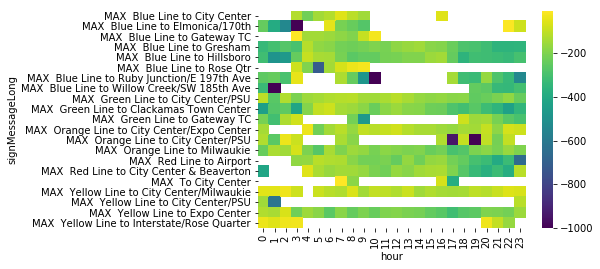

In [131]:
result = delays.pivot_table(index='signMessageLong', columns='hour', values='delay')
result
sns.heatmap(result, fmt="g", cmap='viridis')

plt.show()

In [123]:
trip_event_merge.isnull().any()

index                         False
bearing                       False
delay                         False
timestamp                     False
lastLocID                     False
lastStopSeq                   False
nextLocID                     False
nextStopSeq                   False
signMessageLong               False
tripID                        False
vehicle_id                    False
vehicle_location_longitude    False
vehicle_location_latitude     False
blockID                       False
direction                     False
garage                        False
dtype: bool

In [122]:
trip_event_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833613 entries, 90 to 290
Data columns (total 16 columns):
index                         833613 non-null int64
bearing                       833613 non-null int64
delay                         833613 non-null int64
timestamp                     833613 non-null object
lastLocID                     833613 non-null int64
lastStopSeq                   833613 non-null int64
nextLocID                     833613 non-null int64
nextStopSeq                   833613 non-null int64
signMessageLong               833613 non-null object
tripID                        833613 non-null int64
vehicle_id                    833613 non-null int64
vehicle_location_longitude    833613 non-null float64
vehicle_location_latitude     833613 non-null float64
blockID                       833613 non-null int64
direction                     833613 non-null int64
garage                        833613 non-null object
dtypes: float64(2), int64(11), object(3)
memory usag

In [129]:
trip_event_merge['timestamp'] = pd.to_datetime(trip_event_merge['timestamp'], errors='coerce')
trip_event_merge[(trip_event_merge['signMessageLong'] == 'MAX  Blue Line to City Center') & (trip_event_merge['timestamp'].dt.hour == 16)]

,index,bearing,delay,timestamp,lastLocID,lastStopSeq,nextLocID,nextStopSeq,signMessageLong,tripID,vehicle_id,vehicle_location_longitude,vehicle_location_latitude,blockID,direction,garage
routeNumber,,,,,,,,,,,,,,,,
100,72906,110,-15,2016-12-31 16:34:39-08:00,8333,21,8334,22,MAX Blue Line to City Center,7058894,102,-122.681098,45.518994,9003,0,RUBY
100,72907,109,-1,2016-12-31 16:34:39-08:00,8335,23,8336,24,MAX Blue Line to City Center,7058894,102,-122.674803,45.517254,9003,0,RUBY
100,72908,357,-16,2016-12-31 16:34:39-08:00,8338,26,8339,27,MAX Blue Line to City Center,7058894,102,-122.671347,45.524104,9003,0,RUBY
100,72909,110,-44,2016-12-31 16:34:39-08:00,9758,20,8333,21,MAX Blue Line to City Center,7058894,102,-122.687746,45.520774,9003,0,RUBY
100,72910,19,26,2016-12-31 16:34:39-08:00,9759,19,9758,20,MAX Blue Line to City Center,7058894,102,-122.690699,45.521090,9003,0,RUBY
100,72911,96,-5,2016-12-31 16:34:39-08:00,9821,15,9969,16,MAX Blue Line to City Center,7058894,102,-122.798957,45.492240,9003,0,RUBY
100,72912,126,-2,2016-12-31 16:34:39-08:00,9822,12,9826,13,MAX Blue Line to City Center,7058894,102,-122.831143,45.499387,9003,0,RUBY
100,72913,88,-15,2016-12-31 16:34:39-08:00,9824,14,9821,15,MAX Blue Line to City Center,7058894,102,-122.805108,45.490800,9003,0,RUBY
100,72914,120,-50,2016-12-31 16:34:39-08:00,9826,13,9824,14,MAX Blue Line to City Center,7058894,102,-122.815889,45.492985,9003,0,RUBY
